# Topics in Econometrics and Data Science: Tutorial 5

#### General Note

You will very likely find the solution to these exercises online. We, however, strongly encourage you to work on these exercises without doing so. Understanding someone else’s solution is very different from coming up with your own. Use the lecture notes and try to solve the exercises independently.

# Section 1: Basic Statistics

## Exercise 1: Normal distribution

### A)
A hard-drive manufacturer would like to ensure that the mean time between failures (MTBF) for its new hard drive is $1$ million hours. A stress test is designed that can simulate the workload at a much faster pace. The testers assume that a test lasting $10$ days correlates with the failure time exceeding the $1$- million-hour mark. In stress tests of $15$ hard drives they found an average of $9.5$ days, with a standard deviation of $1$ day. Does a $90\%$ confidence level include $10$ days?

**Hint**: You can use  [`scipy.stats.norm.ppf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) to get the percent point function (critical value) for the normal distribution for a given confidence level.

In [63]:
import scipy.stats as stats
import numpy as np

Two-sided: $$9.5 \pm \frac{1}{\sqrt{15}}q_z(0.95) =  (9.075301, 9.924699) $$

In [45]:
upper = 9.5 + 1 / np.sqrt(15) * stats.norm.ppf(0.95) 
lower = 9.5 - 1 / np.sqrt(15) * stats.norm.ppf(0.95) 
print(f"The 90% confidence interval lies between [{lower}, {upper}]. It does not include 10.")
print(f"The point on the probability distribution corresponding to a two-sided 90% confidence interval (critical value) lies at {stats.norm.ppf(0.95)}")

The 90% confidence interval lies between [9.075300619724539, 9.924699380275461]. It does not include 10.
The point on the probability distribution corresponding to a two-sided 90% confidence interval (critical value) lies at 1.6448536269514722


### B)

Let 
$X\sim \mathcal{N}(\mu,\sigma^2)$. We have seen that

$$
\sqrt{n}\frac{\bar{X}_n-\mu}{\sigma}\sim \mathcal{N}(0,1)
$$ 
and that by replacing the unknown parameter $\sigma^2$ by $\hat{S}^2=\frac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X}_n)^2$ we obtain

$$
Z_n:=\sqrt{n}\frac{\bar{X}_n-\mu}{\hat{S}} \xrightarrow[]{\mathcal{D}} Z\sim \mathcal{N}(0,1).
$$

Therefore we can construct asymptotic confidence intervals for $\mu$. This means that the confidence interval satisfies the confidence level when $n$ is 'large'. But what happens when $n$ is 'small' and what do we mean by 'large'?
The distribution of $Z_n$ is called $t$-distribution with $n-1$ degrees of freedom.
Compare the densities of the normal distribution and the $t$-distribution for $n=3,10,25$ and $50$. What value of $n$ seems 'large' enough to say that the two distributions are essentially the same? 

To answer these questions, first, save $\mu$ and $\sigma$ and use [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to generate evenly spread x-values from -3 to 3, along which you will plot the distributions. 

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm

mu = 0
sigma = np.sqrt(1)
x = np.linspace(-3, 3, 201) 

Next, use [`scipy.stats.norm.pdf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) and [`scipy.stats.t.pdf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) to create density functions along the x-values for the normal distribution and t-distributions for the different n. Save them as different y-variables, e.g. `y1` to `y5`.

In [47]:
# Add the density function
y1 = norm.pdf(x, mu, sigma) 
y2 = t.pdf(x, 2)   # n = 3
y3 = t.pdf(x, 9)   # n = 10
y4 = t.pdf(x, 24)  # n = 25
y5 = t.pdf(x, 49)  # n = 50

Finally, with [`plt.figure`](https://matplotlib.org/stable/api/figure_api.html) and its suboptions, you can plot the distributions.

Text(0.5, 0, 'x')

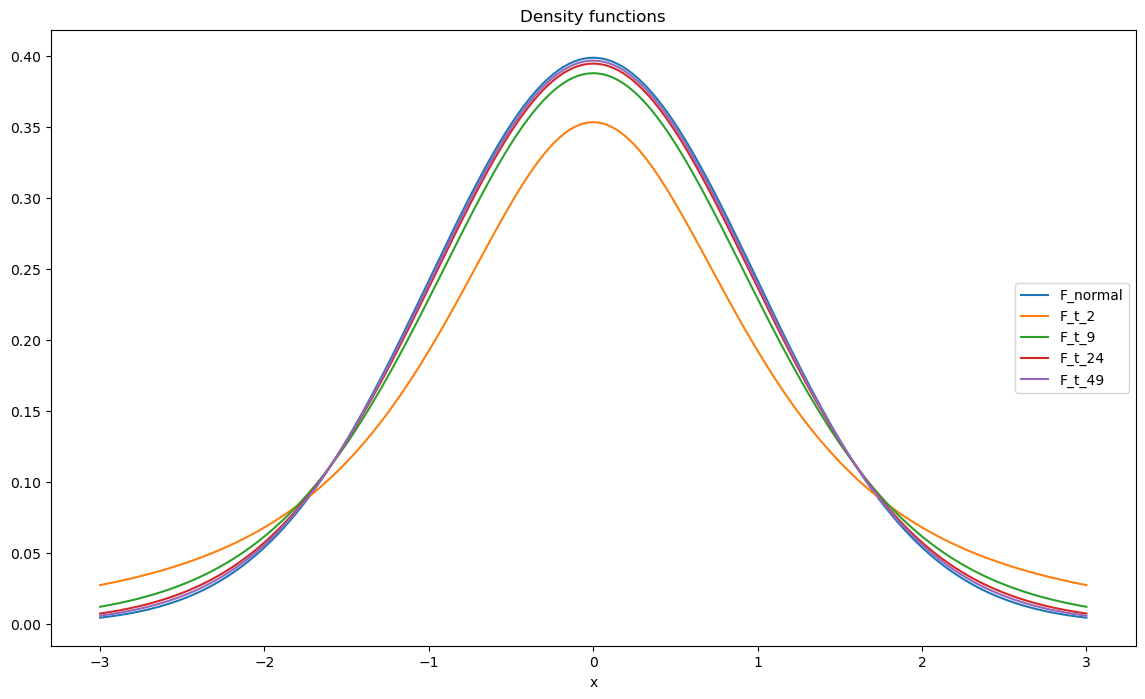

In [48]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, y1, '-', linewidth=1.5, label='F_normal')
ax.plot(x, y2, '-', linewidth=1.5, label='F_t_2')
ax.plot(x, y3, '-', linewidth=1.5, label='F_t_9')
ax.plot(x, y4, '-', linewidth=1.5, label='F_t_24')
ax.plot(x, y5, '-', linewidth=1.5, label='F_t_49')

# layout
ax.grid(False)
ax.legend(loc='right')
ax.set_title('Density functions')
ax.set_xlabel('x')

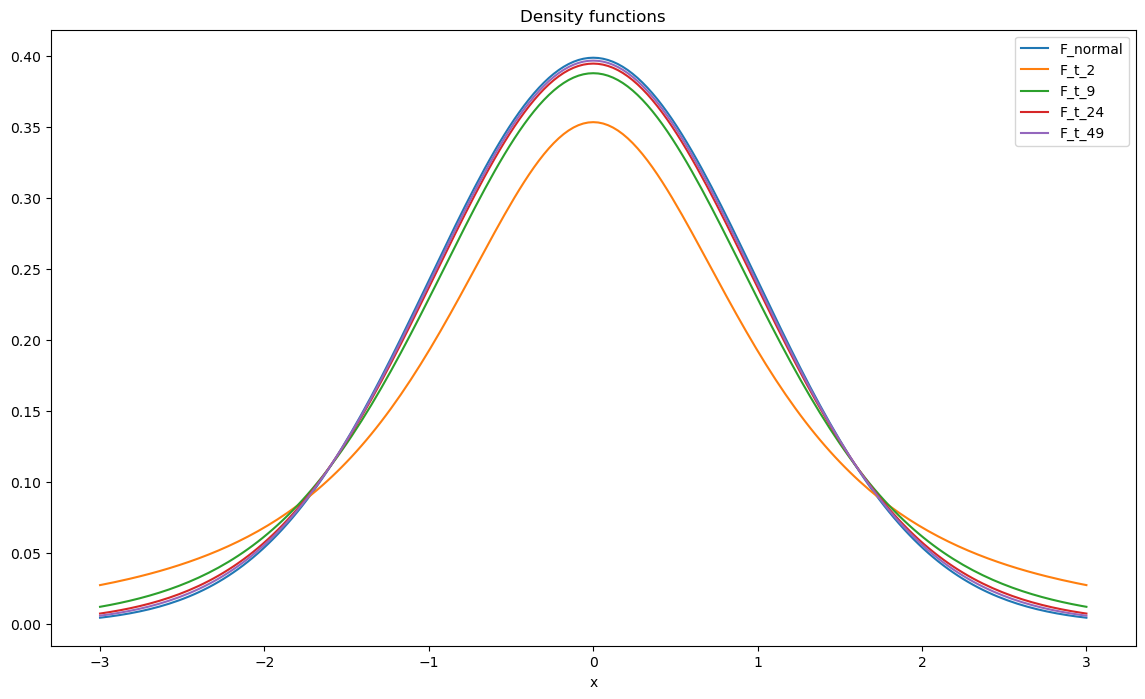

In [49]:
plt.figure(figsize=(14, 8))

plt.plot(x, y1, linewidth=1.5, label='F_normal')
plt.plot(x, y2, linewidth=1.5, label='F_t_2')
plt.plot(x, y3, linewidth=1.5, label='F_t_9')
plt.plot(x, y4, linewidth=1.5, label='F_t_24')
plt.plot(x, y5, linewidth=1.5, label='F_t_49')

# layout
plt.title("Density functions")
plt.xlabel("x")
plt.legend()
plt.show()

### C)
Our goal is to use a simulation to compare the resulting confidence intervals of Exercise 1B) for $\mu=0$ (choose $\sigma^2=5$) with confidence level $95\%$. We will go through it step by step:

1. Load the necessary modules and save $\mu$, $\sigma$, and the critical value from the normal distribution for our given $\alpha$ (1-confidence level).

In [50]:
import scipy.stats as stats
import math

# Save mu and sigma
mu = 0
sigma = math.sqrt(5)

# Critical value, normal distribution
alpha = 0.05
quantile_norm = stats.norm.ppf(q = 1-alpha/2)
print(f"Critical value for 95% confidence interval derived from normal distribution: {quantile_norm}")

Critical value for 95% confidence interval derived from normal distribution: 1.959963984540054


2. Calculate the critical value derived from the t-distribution with $n=3$ and our given $\alpha$.
Use the [`stats.t.ppf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) function.

In [51]:
n = 3
df = n-1 # degrees of freedom for the t-distribution
sample_size = n

# Critical value, t-distribution
quantile_t = stats.t.ppf(q=1-alpha/2,df=df)
print(f"Critical value derived from t-distribution, n = {n}: {quantile_t}")

Critical value derived from t-distribution, n = 3: 4.302652729696142


3. Set the random seed[`np.random.seed`](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.seed.html) to 123. Create one normally distributed sample for $\mu$, $\sigma$, and sample size $n=3$ with [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). Calculate the mean and standard deviation. \
**Hint**: Remark that `np.var()` calculates $\frac{1}{n}\sum_{i=1}^n(X_i-\bar{X}_n)^2$.

In [52]:
np.random.seed(123)
sample = np.random.normal(mu, sigma, n)
sample_mean = sample.mean()
sample_std = math.sqrt(n/(n-1)*np.var(sample)) # the square root of the corrected sample variance

4. Calculate confidence intervals based on the normal distribution and the t-distribution for $n=3$. Check whether the true parameter $\mu$ is contained in the confidence intervals.

Recall:
$$
\bar{X}_n \pm \frac{\tilde{S}}{\sqrt{n}}q_z(1-\frac{\alpha}{2})
$$

and

$$
\bar{X}_n \pm \frac{\tilde{S}}{\sqrt{n}}q_t(1-\frac{\alpha}{2})
$$

In [53]:
confidence_interval_normal = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_norm,
                                sample_mean + (sample_std/math.sqrt(sample_size))*quantile_norm) 

confidence_interval_t = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_t,
                            sample_mean + (sample_std/math.sqrt(sample_size))*quantile_t) 

print(f"Mean: {sample_mean}, \nCI normal: {confidence_interval_normal}, \nCI t-distr: {confidence_interval_t}")

if (confidence_interval_normal[0] <= mu and confidence_interval_normal[1] >= mu):
    print("Mean contained in CI based on normal distribution")
if (confidence_interval_t[0] <= mu and confidence_interval_t[1] >= mu):
    print(f"Mean contained in CI based on t-distribution with n = {n}")

Mean: 0.14511584866388894, 
CI normal: (-2.533143089464705, 2.823374786792483), 
CI t-distr: (-5.734389194218998, 6.0246208915467765)
Mean contained in CI based on normal distribution
Mean contained in CI based on t-distribution with n = 3


5. Repeat the procedure for $1000$ samples. How often does the mean lie within the confidence interval?

In [54]:
np.random.seed(123)
l = 1000

count_1 = 0
count_2 = 0

for l in range(0,l):
    sample = np.random.normal(mu, sigma, sample_size) 
    sample_mean = sample.mean() 
    sample_std = math.sqrt(n/(n-1)*np.var(sample)) 
    
    confidence_interval_normal = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_norm,
                                    sample_mean + (sample_std/math.sqrt(sample_size))*quantile_norm) 
    
    confidence_interval_t = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_t, 
                                sample_mean + (sample_std/math.sqrt(sample_size))*quantile_t) 
    
    if (confidence_interval_normal[0] <= mu and confidence_interval_normal[1] >= mu):
        count_1 += 1
    if (confidence_interval_t[0] <= mu and confidence_interval_t[1] >= mu):
        count_2 += 1 
        
print("Coverage normal for n =",n,":", count_1/l*100) 
print("Coverage t for n =",n,":", count_2/l*100 ) 

Coverage normal for n = 3 : 80.08008008008008
Coverage t for n = 3 : 95.4954954954955


6. Finally, repeat the simulation for each $n$ (= 3, 10, 25 and 50): Calculate $1000$ independent samples and count how often the true parameter $\mu=0$ is contained in the confidence interval.\
**Hint**: Loop over $n$ (outer loop) and then loop over $l$ (inner loop).

In [ ]:
np.random.seed(123)
n_vec = np.array([3,10,25,50])
l = 1000

for n in n_vec:
    print(f"\nRunning simulation for n = {n}")
    count_1 = 0
    count_2 = 0
    df = n-1 # degrees of freedom for the t-distribution
    sample_size = n

    # Critical value, t-distribution
    quantile_t = stats.t.ppf(q=1-alpha/2,df=df)
    print(f"Critical value derived from t-distribution: {quantile_t}")
    
    for l in range(0,l):
        sample = np.random.normal(mu, sigma, sample_size)
        sample_mean = sample.mean()
        sample_std = math.sqrt(n/(n-1)*np.var(sample)) 
        
        confidence_interval_normal = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_norm,
                                      sample_mean + (sample_std/math.sqrt(sample_size))*quantile_norm) 
        
        confidence_interval_t = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_t,
                                 sample_mean + (sample_std/math.sqrt(sample_size))*quantile_t) 
        
        if (confidence_interval_normal[0] <= mu and confidence_interval_normal[1] >= mu):
            count_1 += 1
        if (confidence_interval_t[0] <= mu and confidence_interval_t[1] >= mu):
            count_2 += 1 
            
    print("Coverage normal for n =",n,":", count_1/l*100)
    print("Coverage t for n =",n,":", count_2/l*100 )



Running simulation for n = 3
Critical value derived from t-distribution: 4.302652729696142
Coverage normal for n = 3 : 80.08008008008008
Coverage t for n = 3 : 95.4954954954955

Running simulation for n = 10
Critical value derived from t-distribution: 2.2621571628540993
Coverage normal for n = 10 : 91.98396793587175
Coverage t for n = 10 : 94.88977955911824

Running simulation for n = 25
Critical value derived from t-distribution: 2.0638985616280205
Coverage normal for n = 25 : 92.87863590772318
Coverage t for n = 25 : 94.38314944834504

Running simulation for n = 50
Critical value derived from t-distribution: 2.0095752371292397
Coverage normal for n = 50 : 95.18072289156626
Coverage t for n = 50 : 95.28112449799197


Full code:

In [56]:
import scipy.stats as stats
import math

# Save mu and sigma
mu = 0
sigma = math.sqrt(5)

# Critical value, normal distribution
alpha = 0.05
quantile_norm = stats.norm.ppf(q = 1-alpha/2)
print(f"Critical value for 95% confidence interval derived from normal distribution: {quantile_norm}")

np.random.seed(123)
n_vec = np.array([3,10,25,50])
l = 1000

for n in n_vec:
    print(f"\nRunning simulation for n = {n}")
    count_1 = 0
    count_2 = 0
    df = n-1 # degrees of freedom for the t-distribution
    sample_size = n

    # Critical value, t-distribution
    quantile_t = stats.t.ppf(q=1-alpha/2,df=df)
    print(f"Critical value derived from t-distribution: {quantile_t}")
    
    for l in range(0,l):
        sample = np.random.normal(mu, sigma, sample_size)
        sample_mean = sample.mean()
        sample_std = math.sqrt(n/(n-1)*np.var(sample)) 
        
        confidence_interval_normal = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_norm,
                                      sample_mean + (sample_std/math.sqrt(sample_size))*quantile_norm) 
        
        confidence_interval_t = (sample_mean - (sample_std/math.sqrt(sample_size))*quantile_t,
                                 sample_mean + (sample_std/math.sqrt(sample_size))*quantile_t) 
        
        if (confidence_interval_normal[0] <= mu and confidence_interval_normal[1] >= mu):
            count_1 += 1
        if (confidence_interval_t[0] <= mu and confidence_interval_t[1] >= mu):
            count_2 += 1 
            
    print("Coverage normal for n =",n,":", count_1/l*100)
    print("Coverage t for n =",n,":", count_2/l*100 )

Critical value for 95% confidence interval derived from normal distribution: 1.959963984540054

Running simulation for n = 3
Critical value derived from t-distribution: 4.302652729696142
Coverage normal for n = 3 : 80.08008008008008
Coverage t for n = 3 : 95.4954954954955

Running simulation for n = 10
Critical value derived from t-distribution: 2.2621571628540993
Coverage normal for n = 10 : 91.98396793587175
Coverage t for n = 10 : 94.88977955911824

Running simulation for n = 25
Critical value derived from t-distribution: 2.0638985616280205
Coverage normal for n = 25 : 92.87863590772318
Coverage t for n = 25 : 94.38314944834504

Running simulation for n = 50
Critical value derived from t-distribution: 2.0095752371292397
Coverage normal for n = 50 : 95.18072289156626
Coverage t for n = 50 : 95.28112449799197


## Exercise 2: Hypothesis Testing (I)

Load the [`brain_size.csv`](https://maramattes.github.io/StatProg-HHU/data/brain_size.csv) data set from last week and repeat the data cleaning steps (remove column `'Unnamed: 0'`)

In [ ]:
import os
path = ".../data/"
os.chdir(path)

import numpy as np
import pandas as pd

brain_size = pd.read_csv('brain_size.csv', sep=';', na_values=".")
brain_size.drop(['Unnamed: 0'], axis = 1, inplace = True)

print(brain_size.head())
print(f"Dimensions of dataset: {brain_size.shape}")

   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0  Female   133  132  124   118.0    64.5     816932
1    Male   140  150  124     NaN    72.5    1001121
2    Male   139  123  150   143.0    73.3    1038437
3    Male   133  129  128   172.0    68.8     965353
4  Female   137  132  134   147.0    65.0     951545
Dimensions of dataset: (40, 7)


At first we calculate some more descriptive statistics.

### A)
Plot the weight as a histogram using [`plt.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

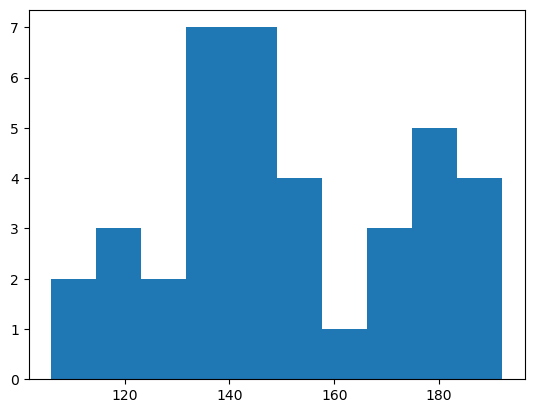

In [58]:
import matplotlib.pyplot as plt
plt.hist(brain_size.dropna()['Weight'], bins = 10)
plt.show()

Assume that the VIQ, weight and height are normally distributed.

### B) 
What can you say about the hypothesis that the mean of the VIQ is 100? Perform a one-sample t-test. 

**Hint**: Use [`stats.ttest_1samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html).

In [59]:
import scipy.stats as stats
import numpy as np
print(brain_size['VIQ'].mean())
print(np.shape(brain_size))
stats.ttest_1samp(brain_size['VIQ'].values, 100)

112.35
(40, 7)


TtestResult(statistic=3.307414638540179, pvalue=0.002030117404781822, df=39)

### C)
Can you reject the hypothesis that the mean of the VIQ is the same for women and men?

**Hint**: Perform the T-test for the means of two independent samples of scores using [`ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind). Familiarise yourself with the function using `help(stats.ttest_ind)`. 

In [60]:
# help(stats.ttest_ind)

In [61]:
female_viq = brain_size[brain_size['Gender'] == 'Female']['VIQ']
male_viq = brain_size[brain_size['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq,equal_var=True)

TtestResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217, df=38.0)

In [62]:
stats.ttest_ind(female_viq, male_viq,equal_var=False)

TtestResult(statistic=-0.7726161723275012, pvalue=0.44466074519419074, df=36.973150284539706)